### Read in Libraries

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from fbprophet import Prophet
import plotly.express as px
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

### Read in the data

In [157]:
df = pd.read_csv('../../data/final_dfs/combined_final.csv')
temp_df = pd.read_csv('../../data/temperature/austin_weather.csv')

In [164]:
df['date']=pd.to_datetime(df['date'])
df = df.loc[(df['date'] >= '2013-12-21') & (df['date'] <= '2017-07-31')]
df = df[['date', 'NGas']]
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df_full = pd.concat([df, temp_df], axis =1)

In [165]:
df_full = df_full[['date', 'NGas', 'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']]

In [166]:
train_dates = pd.to_datetime(df['date'])
df_full.set_index('date', inplace=True)

In [167]:
df_full

,NGas,TempAvgF,HumidityAvgPercent,WindAvgMPH
date,,,,
2013-12-21,344801.997150,60,75,4
2013-12-22,324703.062930,48,68,6
2013-12-23,257270.863400,45,52,3
2013-12-24,238331.650520,46,56,4
2013-12-25,249436.386030,50,71,2
...,...,...,...,...
2017-07-27,680403.230212,89,54,5
2017-07-28,724921.294601,91,54,5
2017-07-29,697139.035391,92,51,4


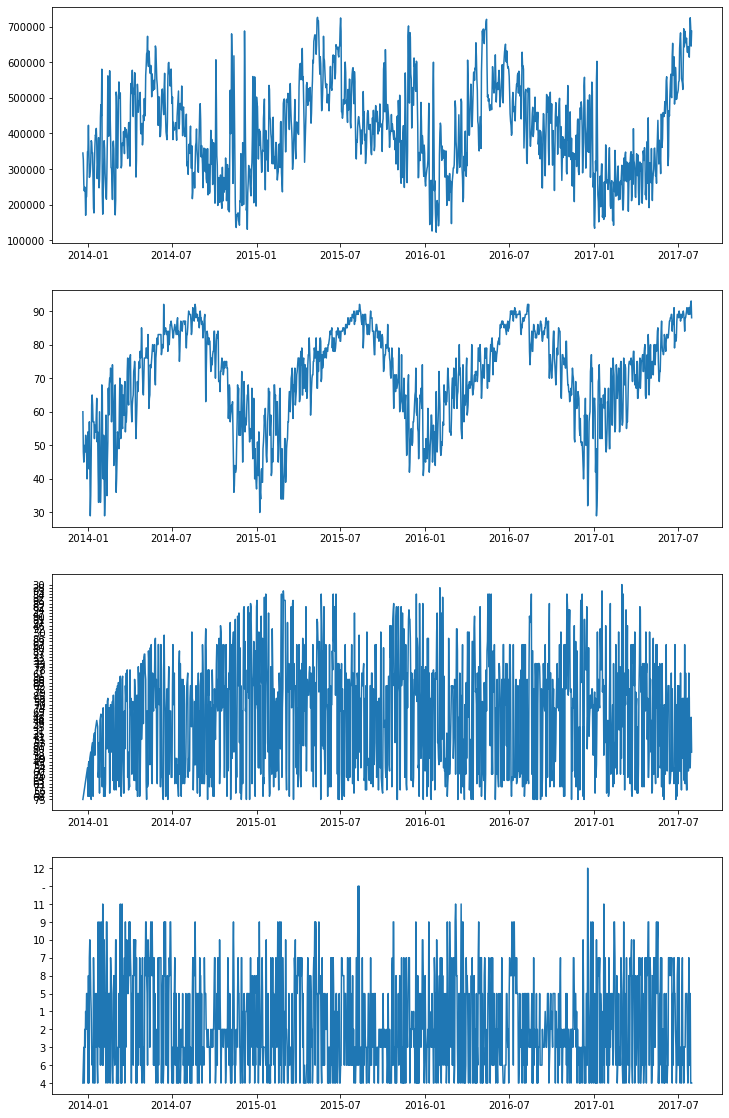

In [120]:
fig, axs = plt.subplots(4)
fig.set_figheight(20)
fig.set_figwidth(12)
axs[0].plot(df_full['NGas']);
axs[1].plot(df_full['TempAvgF']);
axs[2].plot(df_full['HumidityAvgPercent']);
axs[3].plot(df_full['WindAvgMPH']);

In [121]:
df_full.corr()

,NGas,TempAvgF
NGas,1.00000,0.34687
TempAvgF,0.34687,1.00000


In [122]:
df_full=df_full.reset_index()[['date', 'NGas', 'TempAvgF']].rename({'date':'ds','NGas':'y','TempAvgF':'temp'},axis='columns')

In [123]:
df_full

,ds,y,temp
0,2013-12-21,344801.997150,60
1,2013-12-22,324703.062930,48
2,2013-12-23,257270.863400,45
3,2013-12-24,238331.650520,46
4,2013-12-25,249436.386030,50
...,...,...,...
1314,2017-07-27,680403.230212,89
1315,2017-07-28,724921.294601,91
1316,2017-07-29,697139.035391,92
1317,2017-07-30,645335.615699,93


In [124]:
df_final[['y', 'temp']].corr()

,y,temp
y,1.00000,0.34687
temp,0.34687,1.00000


In [125]:
train = df_final[(df_final['ds'] >= '2013-12-21') & (df_final['ds'] < '2017-01-01')]
test = df_final[(df_final['ds'] >= '2017-01-01')]

In [126]:
test

,ds,y,temp
1107,2017-01-01,141613.098056,63
1108,2017-01-02,133299.837431,64
1109,2017-01-03,194640.611113,60
1110,2017-01-04,322016.536242,42
1111,2017-01-05,294446.048610,49
...,...,...,...
1314,2017-07-27,680403.230212,89
1315,2017-07-28,724921.294601,91
1316,2017-07-29,697139.035391,92
1317,2017-07-30,645335.615699,93


In [127]:
train

,ds,y,temp
0,2013-12-21,344801.997150,60
1,2013-12-22,324703.062930,48
2,2013-12-23,257270.863400,45
3,2013-12-24,238331.650520,46
4,2013-12-25,249436.386030,50
...,...,...,...
1102,2016-12-27,544135.696414,69
1103,2016-12-28,517874.066632,73
1104,2016-12-29,327643.698096,60
1105,2016-12-30,248546.588394,52


In [128]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)

In [129]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
m.params

{'k': array([[-0.03031728]]),
 'm': array([[0.54269643]]),
 'delta': array([[-4.14197031e-08,  3.27351377e-08, -6.04441124e-08,
          5.76532589e-08,  2.11859691e-02,  6.17735398e-02,
          8.46592322e-02,  8.27204841e-02,  3.44959136e-02,
          2.69747476e-08, -2.77729291e-08,  8.76239936e-09,
         -1.73454112e-04, -3.35177135e-02, -5.99193611e-02,
         -7.10016061e-02, -6.50965477e-02, -5.70900129e-02,
         -1.97463150e-02,  2.47492879e-08,  5.73068323e-08,
          1.77135585e-03,  2.01565615e-02,  1.09431265e-02,
          6.97980156e-04]]),
 'sigma_obs': array([[0.1228477]]),
 'beta': array([[ 0.05704178, -0.12009893, -0.06369326,  0.01855448,  0.00163284,
          0.00886334,  0.00033834,  0.00687895, -0.02045893, -0.00836598,
          0.00337814, -0.00162664,  0.00255622, -0.01476338, -0.00873464,
          0.0003521 ,  0.01106826, -0.00800721, -0.02092042, -0.01791078,
         -0.00160783,  0.00130925, -0.00634297,  0.00258908, -0.00087969,
         

In [131]:
future = m.make_future_dataframe(periods=302)
future.tail

<bound method NDFrame.tail of              ds
0    2013-12-21
1    2013-12-22
2    2013-12-23
3    2013-12-24
4    2013-12-25
...         ...
1404 2017-10-25
1405 2017-10-26
1406 2017-10-27
1407 2017-10-28
1408 2017-10-29

[1409 rows x 1 columns]>

In [132]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1404,2017-10-25,357797.018569,187501.267871,524552.687926
1405,2017-10-26,352923.609998,191195.561988,525762.552957
1406,2017-10-27,344959.209261,160833.061425,513198.459221
1407,2017-10-28,349119.487402,176537.402565,520941.136980
1408,2017-10-29,353162.509870,178152.307114,515120.956025


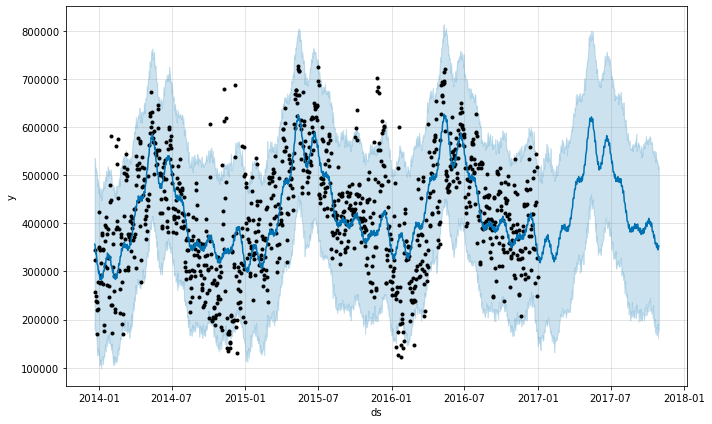

In [133]:
fig1 = m.plot(forecast)

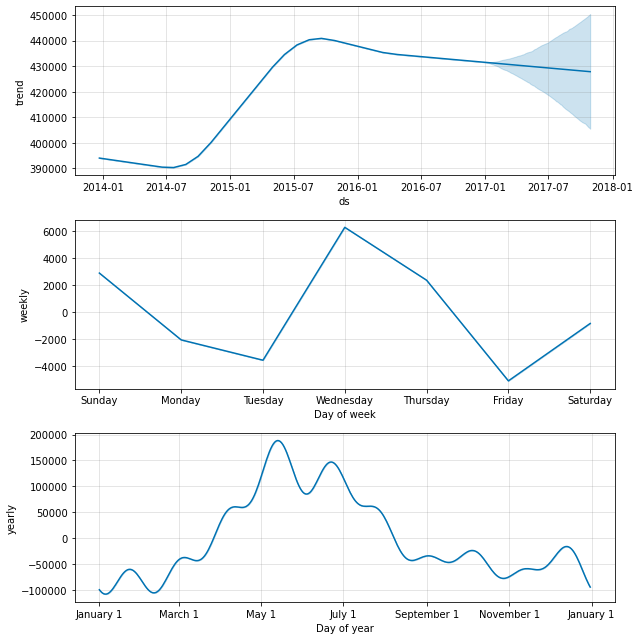

In [134]:
fig2 = m.plot_components(forecast)

### Cross Validation and Performance Metrics

In [135]:

cv_results = cross_validation(model = m, initial='1000 days', horizon='90 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-10-02 00:00:00 and 2016-10-02 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,6.739504e+09,82094.479700,70106.163975,0.215064,0.182954,1.000000
1,10 days,5.959007e+09,77194.604846,64860.147085,0.192648,0.162317,1.000000
2,11 days,6.311599e+09,79445.570574,70901.057543,0.206255,0.162317,1.000000
3,12 days,5.837376e+09,76402.720500,66365.031754,0.193261,0.127364,1.000000
4,13 days,5.686096e+09,75406.209455,64876.544941,0.187017,0.113580,1.000000
...,...,...,...,...,...,...,...
77,86 days,9.467958e+09,97303.430197,79818.356032,0.186278,0.168216,0.888889
78,87 days,1.250770e+10,111837.842808,94504.995897,0.210713,0.213857,0.777778
79,88 days,1.233366e+10,111057.003870,91098.961838,0.203347,0.213857,0.777778
80,89 days,1.280655e+10,113166.028184,95130.153658,0.224694,0.257885,0.777778


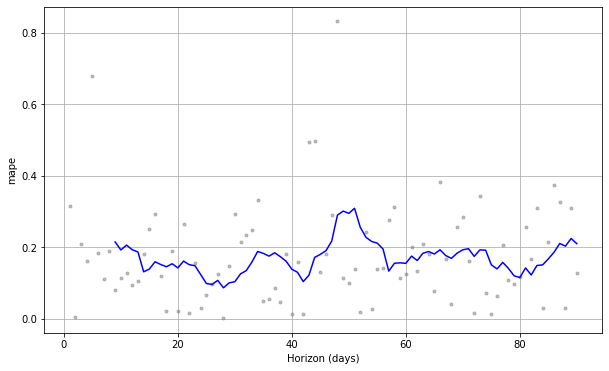

In [136]:
fig3 = plot_cross_validation_metric(cv_results, metric='mape')